In [ ]:
import plotly.express as px
import pandas as pd
import time
t1 = time.time()
df00 = pd.DataFrame({'Col A': ["LOC", "Executed Instructions", "Binary Size (KB)", "CPU Clock Cycles"],
                  "Bare-SGX":      [357,    20992,   3.6,    15452],
    "Intel SGX SDK": [51153,  28779,   101.8,  24410],
    "Open Enclave":  [15771,  44765,   1519.1, 51340]})
fig = px.line_polar(df00, r=['Bare-SGX'], theta='Col A', line_close=True)
fig.show()
t2 = time.time()
print(t2-t1)

ValueError: All arguments should have the same length. The length of column argument `df[theta]` is 4, whereas the length of previously-processed arguments ['r'] is 2

Col A              LOC  Executed Instructions  Binary Size (KB)  \
Bare-SGX         357.0                   29.0               3.6   
Intel SGX SDK  51153.0                 1179.0             101.8   
Open Enclave   15771.0                28040.0            1519.1   

Col A          CPU Clock Cycles  
Bare-SGX                 9708.0  
Intel SGX SDK           12622.0  
Open Enclave            36598.0  
Col A               LOC  Executed Instructions  Binary Size (KB)  \
Bare-SGX       1.000000               1.000000          1.000000   
Intel SGX SDK  0.542098               0.476116          0.277078   
Open Enclave   0.608088               0.328793          0.174851   

Col A          CPU Clock Cycles  
Bare-SGX               1.000000  
Intel SGX SDK          0.972203  
Open Enclave           0.873708  
[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


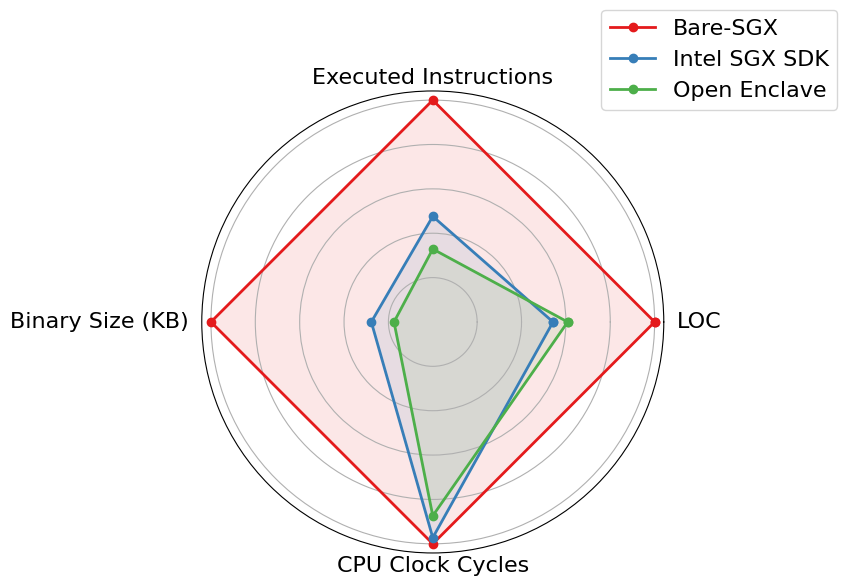

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Input DataFrame
df = pd.DataFrame({
    'Col A': ["LOC", "Executed Instructions", "Binary Size (KB)", "CPU Clock Cycles"],
    "Bare-SGX":      [357,    29,   3.6,    9708],
    "Intel SGX SDK": [51153,  1179,   101.8,  12622],
    "Open Enclave":  [15771,  28040,   1519.1, 36598]
})

# Set index to "Col A" so rows are metric names
df.set_index('Col A', inplace=True)

# Transpose to have each implementation as a row
df_t = df.T

print(df_t)

# Log-scale and normalize each column (metric) independently
log_df = np.log2(df_t)
normed_df = 1/log_df

# ...existing code...
# Divide each column by its max value
normed_df = normed_df.div(normed_df.max(), axis=1)
# ...existing code...


print(normed_df)
# Radar setup
labels = df.index.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

print(angles)

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
palette = sns.color_palette("Set1", n_colors=len(normed_df))

for idx, (name, row) in enumerate(normed_df.iterrows()):
    values = row.tolist() + [row.tolist()[0]]  # Close the loop
    ax.plot(angles, values, label=name, color=palette[idx], marker='o', linewidth=2)
    ax.fill(angles, values, color=palette[idx], alpha=0.1)

# Axis config
ax.set_xticks([])  # Remove default xticks
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# Custom placement of labels farther from the center

for label, angle in zip(ax.get_xticklabels(), angles):
    label.set_rotation(np.degrees(angle))
    label.set_horizontalalignment('center')

#ax.set_rlabel_position(-45)
#ax.set_yticks([0.1,0.3,0.5,0.7,0.9])
ax.set_yticklabels(["","","","","",""], fontsize=16)

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.2), frameon=True, fontsize=16)

label_offset = 1.1 # Adjust multiplier as needed
for angle, label in zip([angles[0]], [labels[0]]):
    ax.text(angle, label_offset, label, size=16, ha='left', va='center')
for angle, label in zip([angles[1],angles[3]], [labels[1],labels[3]]):
    ax.text(angle, label_offset, label, size=16, ha='center', va='center')
for angle, label in zip([angles[2]], [labels[2]]):
    ax.text(angle, label_offset, label, size=16, ha='right', va='center')



plt.savefig("radar_plot.png", dpi=500, bbox_inches='tight', pad_inches=0.2, format='png')
#plt.tight_layout()
plt.show()




In [6]:
import pandas as pd
import numpy as np

# Original data
df = pd.DataFrame({
    'Col A': ["LOC", "Executed Instructions", "Binary Size (KB)", "CPU Clock Cycles"],
    "Bare-SGX":      [357,    20992,   3.6,    15452],
    "Intel SGX SDK": [51153,  28779,   101.8,  24410],
    "Open Enclave":  [15771,  44765,   1519.1, 51340]
})

# Set metric names as index
df.set_index('Col A', inplace=True)

# Transpose so rows = implementations
df_t = df.T

# Normalize using log10, invert so lower = better
log_df = np.emath.logn(100,df_t)
normed_df = (log_df.max() - log_df) / (log_df.max() - log_df.min()) * 100

# Round for cleaner output
normed_df_rounded = normed_df.round(2)
print(normed_df_rounded)

[[5.194e+01 9.350e+00 1.000e+02 1.255e+01]
 [4.000e-02 6.050e+00 6.506e+01 7.770e+00]
 [1.234e+01 1.430e+00 3.680e+01 0.000e+00]]
